# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pywedge as pw

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_excel('data_pelanggan.xlsx')
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,Nilai Belanja Setahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [4]:
df = df.rename(columns={'Nama Pelanggan': 'Customer_name', 'Jenis Kelamin': 'Gender', 'Umur':'Age', 'Profesi':'Profession', 'Nilai Belanja Setahun': 'Annual Spending Value','Tipe Residen':'Resident Type'})

In [5]:
# Mengganti nilai unik dalam kolom 'Jenis Kelamin'
df['Gender'] = df['Gender'].replace({'Pria': 'Male', 'Wanita': 'Female'})
df['Profession'] = df['Profession'].replace({'Wiraswasta': 'Self-Employed', 'Pelajar': 'Student', 'Profesional':'Professional','Ibu Rumah Tangga':'House Wife','Mahasiswa':'College Student'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Customer_ID            50 non-null     object
 1   Customer_name          50 non-null     object
 2   Gender                 50 non-null     object
 3   Age                    50 non-null     int64 
 4   Profession             50 non-null     object
 5   Resident Type          50 non-null     object
 6   Annual Spending Value  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


In [7]:
df.describe()

,Age,Annual Spending Value
count,50.000000,5.000000e+01
mean,37.500000,7.069875e+06
std,14.673661,2.590619e+06
min,14.000000,2.722700e+06
25%,25.000000,5.257530e+06
50%,35.000000,5.980077e+06
75%,49.750000,9.739615e+06
max,64.000000,1.088451e+07


In [8]:
df.describe(exclude=['float64', 'int64'])

,Customer_ID,Customer_name,Gender,Profession,Resident Type
count,50,50,50,50,50
unique,50,48,2,5,2
top,CUST-001,Shirley Ratuwati,Female,Self-Employed,Cluster
freq,1,2,41,20,32


# Handling Missing Value

In [11]:
df['Gender'] = df['Gender'].fillna('Female')

In [12]:
# Menyiapkan kolom kategorikal  
kolom_kategorikal = df.select_dtypes('object')
# Menyiapkan kolom numerikal
kolom_numerik = df.select_dtypes('int64')

# Split Numerikal & Kategorikal Data

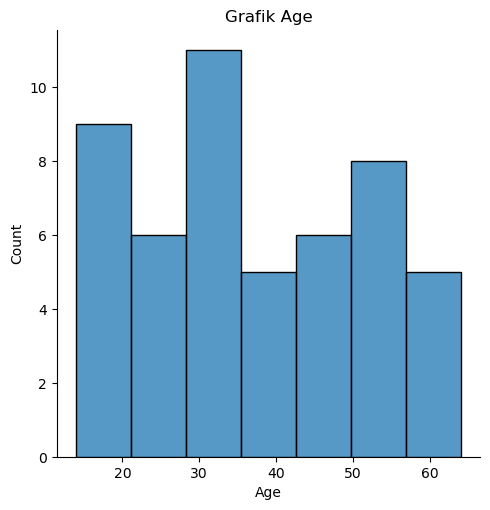

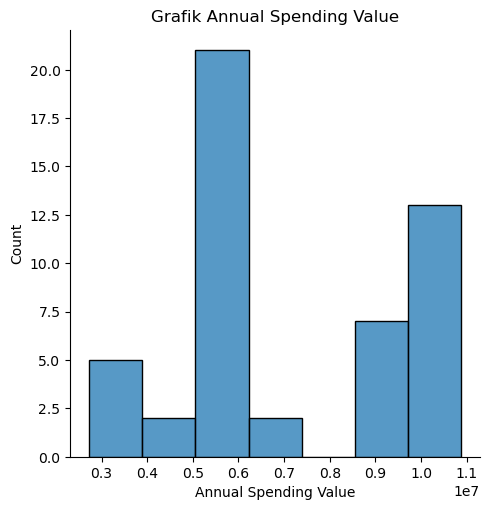

In [13]:
# Membuat plot untuk setiap kolom kategorikal 
for i in kolom_numerik:
    sns.displot(kolom_numerik, x=i);
    plt.title('Grafik {}'.format(i));
    plt.savefig('plot_{}.jpg'.format(i))  # Menyimpan plot dalam format JPG

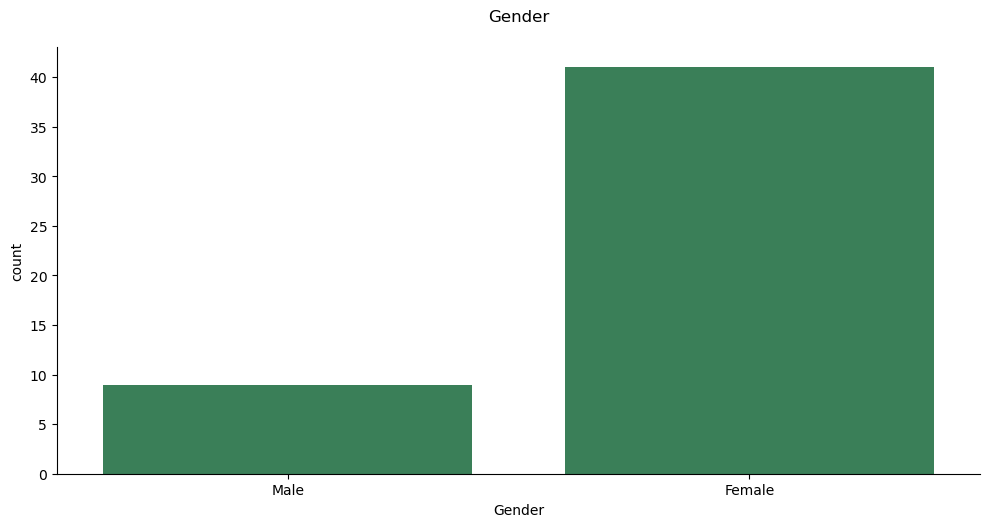

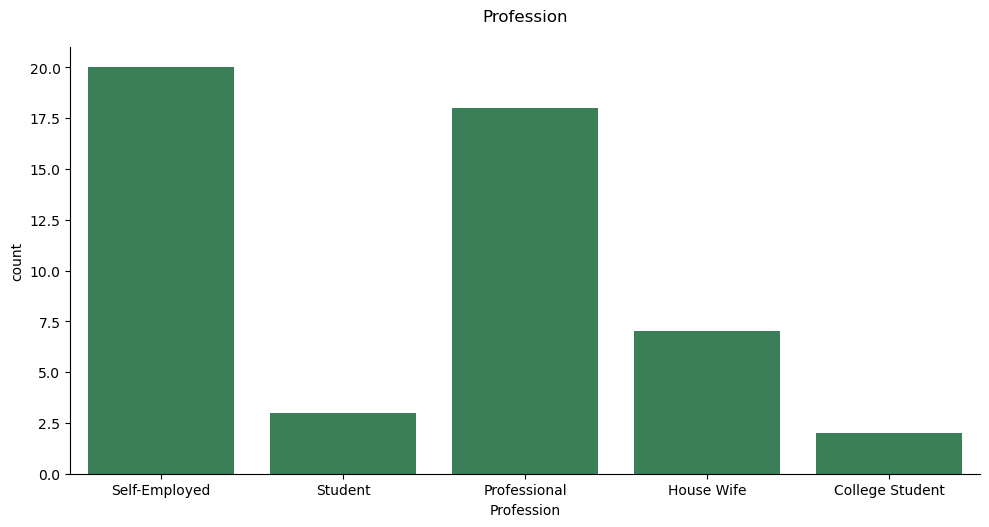

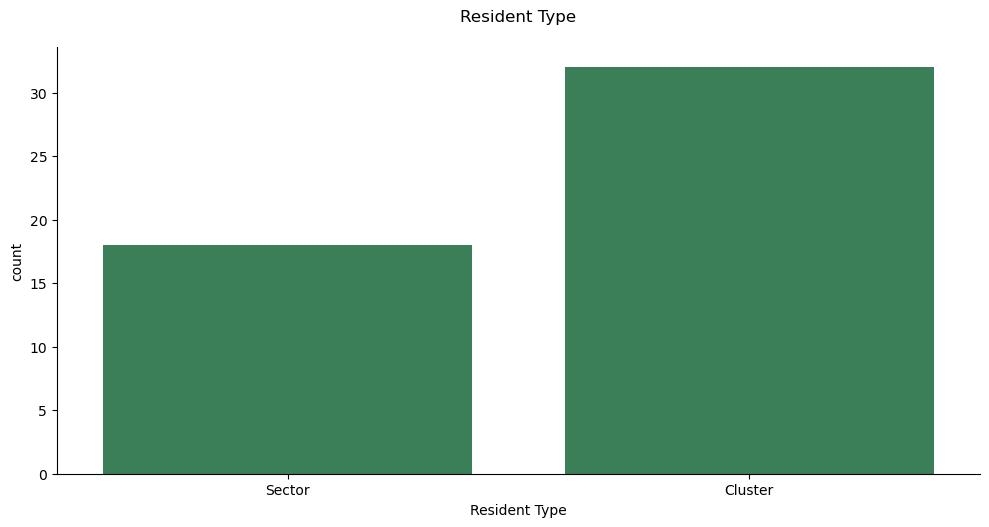

In [15]:
tiga_kolom_kategorik = kolom_kategorikal.drop(['Customer_name', 'Customer_ID'], axis=1)

for i in tiga_kolom_kategorik:
    sns.catplot(data=tiga_kolom_kategorik, x=i, kind="count", aspect=2, color='seagreen');
    plt.title('{}\n'.format(i), fontsize=12);
    plt.savefig('plot_{}.jpg'.format(i))  # Menyimpan plot dalam format JPG

# Feature Scaling Data Numerik

In [16]:
from sklearn.preprocessing import StandardScaler

# Statistik sebelum Standardisasi
print('Before Standardization Statistics\n')
print(kolom_numerik.describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(kolom_numerik)

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=kolom_numerik.columns)

# Menampilkan contoh isi data dan summary statistic
print('\n Example of standardization results\n')
print(df_std.head())

Before Standardization Statistics

        Age  Annual Spending Value
count  50.0                   50.0
mean   37.5              7069874.8
std    14.7              2590619.0
min    14.0              2722700.0
25%    25.0              5257529.8
50%    35.0              5980077.0
75%    49.8              9739615.0
max    64.0             10884508.0

 Example of standardization results

        Age  Annual Spending Value
0  1.411245               0.946763
1 -1.617768              -1.695081
2  0.722833              -0.695414
3  1.067039              -0.727361
4  0.240944               1.382421


In [17]:
print('Descriptive statistics of standardization results\n')
df_std = pd.DataFrame(df_std)
print(df_std.describe().round(0))

Descriptive statistics of standardization results

        Age  Annual Spending Value
count  50.0                   50.0
mean   -0.0                   -0.0
std     1.0                    1.0
min    -2.0                   -2.0
25%    -1.0                   -1.0
50%    -0.0                   -0.0
75%     1.0                    1.0
max     2.0                    1.0


# Label Encoder 

In [18]:
from sklearn.preprocessing import LabelEncoder

# Nama kolom yang dibutuhkan untuk dilakukan label encoding
kolom_kategorikal = ['Gender','Profession','Resident Type']  

# Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()

# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode.head())

   Gender  Profession  Resident Type
0       1           3              1
1       0           4              0
2       1           2              0
3       1           2              0
4       0           3              0


# Data Merging

In [38]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index = True, how = 'left')  
df_model.head()

,Gender,Profession,Resident Type,Age,Annual Spending Value
0,1,3,1,1.411245,0.946763
1,0,4,0,-1.617768,-1.695081
2,1,2,0,0.722833,-0.695414
3,1,2,0,1.067039,-0.727361
4,0,3,0,0.240944,1.382421


In [20]:
df_model = pd.DataFrame(df_model)

# Build Model

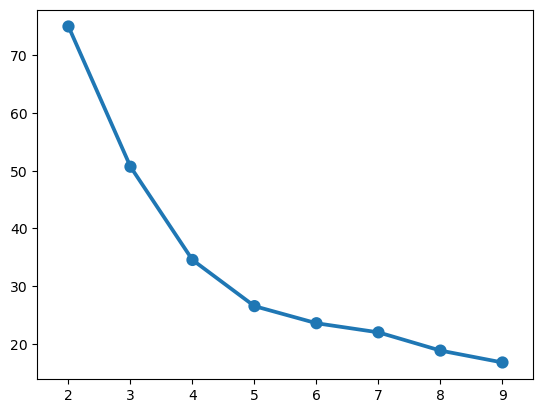

In [21]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
    
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

In [22]:
#Save Model  
kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2]) 

In [23]:
# Menentukan segmen tiap pelanggan`
clusters = kproto.predict(df_model, categorical=[0,1,2])
print('customer segmnet: {}\n'.format(clusters))

customer segmnet: [4 1 2 2 0 3 4 2 3 3 2 2 4 4 0 3 3 2 0 1 0 2 3 0 0 2 0 3 2 2 1 4 1 0 3 0 3
 4 3 1 3 0 3 0 3 0 2 4 3 4]



In [39]:
# Menggabungkan data awal dan segmen pelanggan
df_final = df_model.copy()
df_final['cluster'] = clusters
df_final.head()

,Gender,Profession,Resident Type,Age,Annual Spending Value,cluster
0,1,3,1,1.411245,0.946763,4
1,0,4,0,-1.617768,-1.695081,1
2,1,2,0,0.722833,-0.695414,2
3,1,2,0,1.067039,-0.727361,2
4,0,3,0,0.240944,1.382421,0


In [25]:
df_finali = pd.DataFrame(df_final)
df_finali.head(3)

,Gender,Profession,Resident Type,Age,Annual Spending Value,cluster
0,1,3,1,1.411245,0.946763,4
1,0,4,0,-1.617768,-1.695081,1
2,1,2,0,0.722833,-0.695414,2


In [26]:
# Menampilkan data pelanggan berdasarkan cluster nya
for i in range (0,5):
    print('\nPelanggan cluster: {}\n'.format(i));
    print(df_final[df_final['cluster']== i]);


Pelanggan cluster: 0

    Gender  Profession  Resident Type       Age  Annual Spending Value  \
4        0           3              0  0.240944               1.382421   
14       0           3              0 -1.204721               1.285119   
18       0           3              0 -0.378627               1.487429   
20       0           3              0  0.034421               0.839199   
23       0           3              0  0.103262               1.243749   
24       0           3              1 -0.585150               1.424062   
26       0           3              0 -0.172103               0.797122   
33       0           3              1 -1.135880               1.048883   
35       0           3              0 -0.516309               1.017366   
41       0           3              0 -0.791674               1.095981   
43       0           3              0 -1.342404               0.885081   
45       0           3              1 -0.860515               1.181453   

    cluster  


In [40]:
df_final

,Gender,Profession,Resident Type,Age,Annual Spending Value,cluster
0,1,3,1,1.411245,0.946763,4
1,0,4,0,-1.617768,-1.695081,1
2,1,2,0,0.722833,-0.695414,2
3,1,2,0,1.067039,-0.727361,2
4,0,3,0,0.240944,1.382421,0
5,0,2,0,-0.929356,-0.723055,3
6,1,3,1,1.824292,1.079078,4
7,1,2,0,0.998198,-0.719925,2
8,0,2,1,-0.585150,-0.419818,3
9,1,2,0,-0.309785,-0.706714,3


<Figure size 600x400 with 0 Axes>

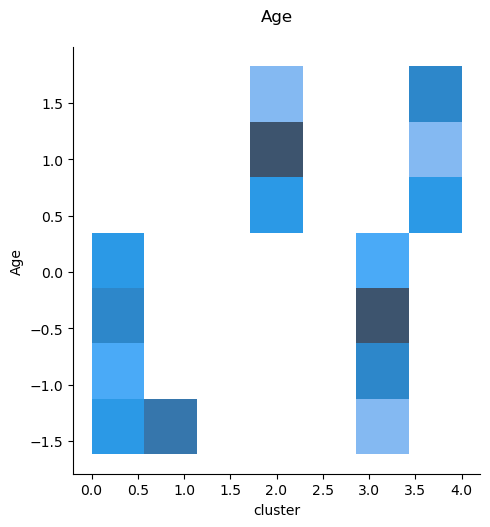

<Figure size 600x400 with 0 Axes>

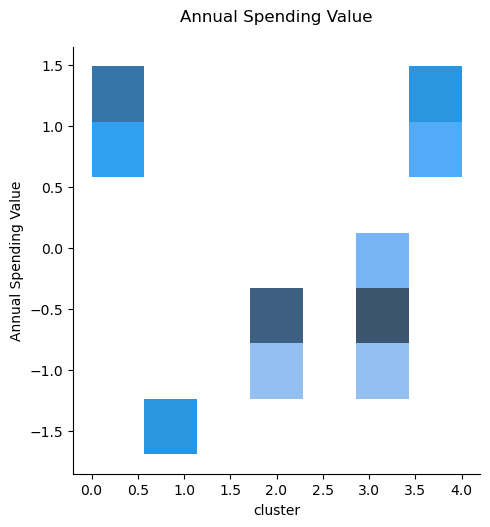

In [27]:
# Data Numerical
kolom_numerik = ['Age','Annual Spending Value']

for i in kolom_numerik:
    plt.figure(figsize=(6,4));
    ax = sns.displot(x = 'cluster', y = i, data = df_final);
    plt.title('{}\n'.format(i), fontsize=12);
    plt.savefig('plot_{}.jpg'.format(i))  # Menyimpan plot dalam format JPG
    plt.show()

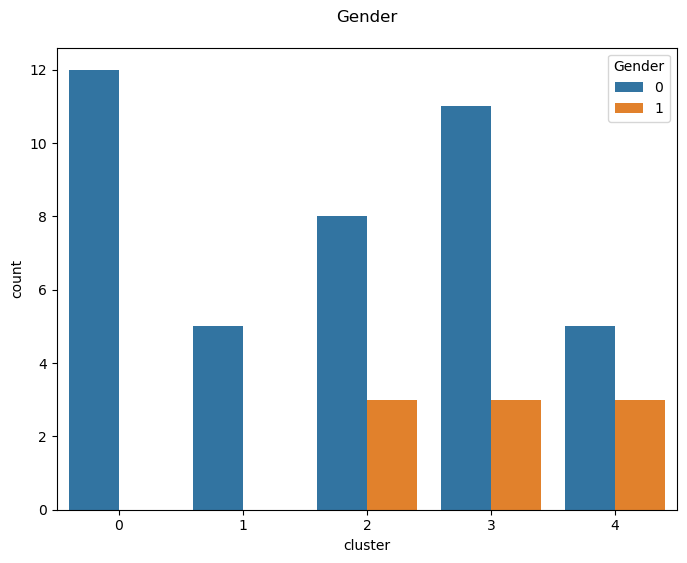

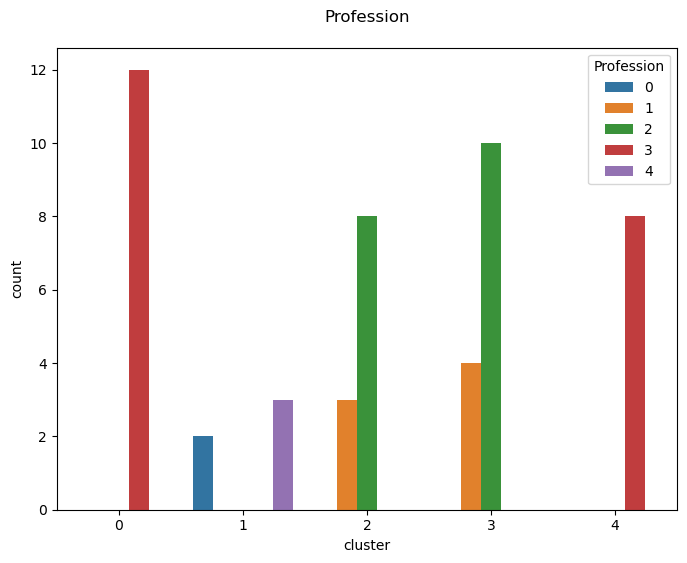

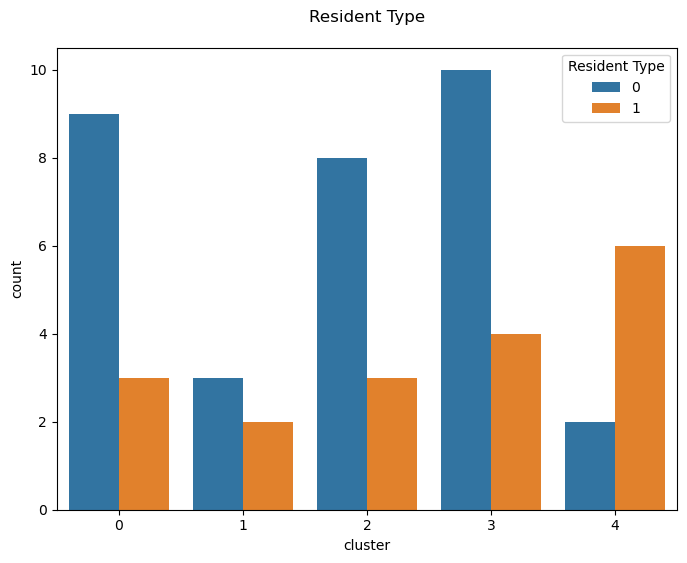

<Figure size 640x480 with 0 Axes>

In [28]:
# Data Kategorikal
for i in kolom_kategorikal:
    plt.figure(figsize=(8,6));
    ax = sns.countplot(data=df_final, x = 'cluster', hue=i);
    plt.title('{}\n'.format(i), fontsize=12);
    plt.savefig('plot_{}.jpg'.format(i))  # Menyimpan plot dalam format JPG
    plt.show()
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sns.despine(right=True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

In [29]:
print('Profesi : ',df['Profession'].value_counts())
print('\n Kode: ',df_final['Profession'].value_counts())

Profesi :  Profession
Self-Employed      20
Professional       18
House Wife          7
Student             3
College Student     2
Name: count, dtype: int64

 Kode:  Profession
3    20
2    18
1     7
4     3
0     2
Name: count, dtype: int64


In [30]:
print('Gender: ', df['Gender'].value_counts())
print('\n Gender Code: ', df_final['Gender'].value_counts())

Gender:  Gender
Female    41
Male       9
Name: count, dtype: int64

 Gender Code:  Gender
0    41
1     9
Name: count, dtype: int64


In [31]:
print('Resident Type: ', df['Resident Type'].value_counts())
print('\n Resident Type Code: ', df_final['Resident Type'].value_counts())

Resident Type:  Resident Type
Cluster    32
Sector     18
Name: count, dtype: int64

 Resident Type Code:  Resident Type
0    32
1    18
Name: count, dtype: int64


In [77]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0:'Diamond Young Entrepreneur',
    1:'Silver Students',
    2:'Gold Senior Member',
    3:'Gold Young Member',
    4:'Diamond Senior Member'
})  

print(df_final.info())
print(df_final.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 50 non-null     int32  
 1   Profession             50 non-null     int32  
 2   Resident Type          50 non-null     int32  
 3   Age                    50 non-null     float64
 4   Annual Spending Value  50 non-null     float64
 5   cluster                50 non-null     uint16 
 6   segmen                 50 non-null     object 
dtypes: float64(2), int32(3), object(1), uint16(1)
memory usage: 2.0+ KB
None
   Gender  Profession  Resident Type       Age  Annual Spending Value  \
0       1           3              1  1.411245               0.946763   
1       0           4              0 -1.617768              -1.695081   
2       1           2              0  0.722833              -0.695414   
3       1           2              0  1.067039              

In [78]:
df_m = pd.DataFrame(df_final)

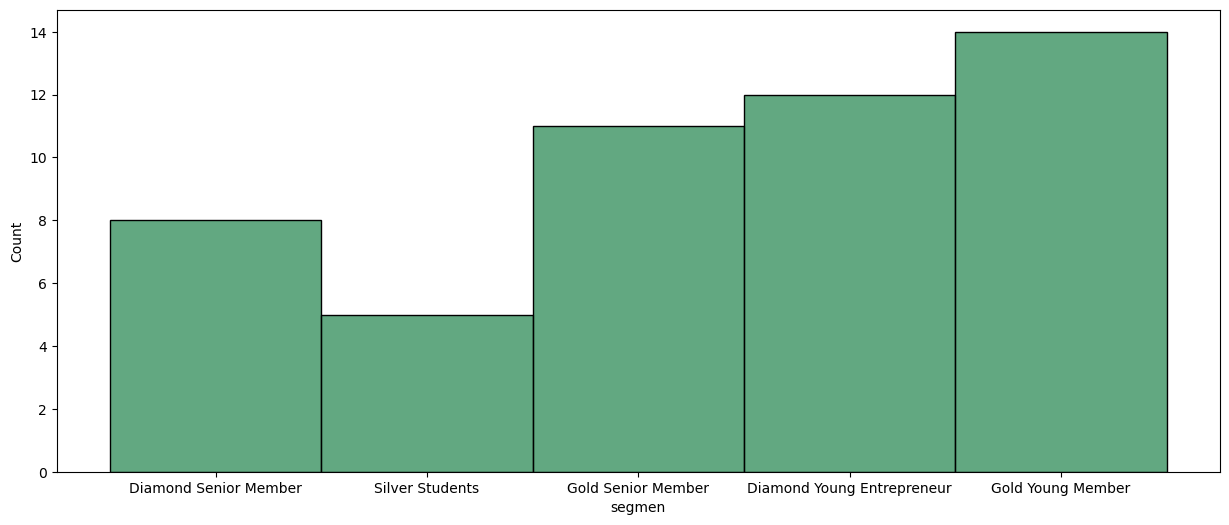

In [79]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_m['segmen'], color='seagreen');

In [80]:
datab[['segmen']]=df_m[['segmen']]

In [81]:
datab[['cluster']]=df_m[['cluster']]

In [82]:
datab

,Customer_ID,Customer_name,Gender,Age,Profession,Resident Type,Annual Spending Value,segmen,cluster
0,CUST-001,Budi Anggara,Male,58,Self-Employed,Sector,9497927,Diamond Senior Member,4
1,CUST-002,Shirley Ratuwati,Female,14,Student,Cluster,2722700,Silver Students,1
2,CUST-003,Agus Cahyono,Male,48,Professional,Cluster,5286429,Gold Senior Member,2
3,CUST-004,Antonius Winarta,Male,53,Professional,Cluster,5204498,Gold Senior Member,2
4,CUST-005,"Sri Wahyuni, IR",Female,41,Self-Employed,Cluster,10615206,Diamond Young Entrepreneur,0
5,CUST-006,Rosalina Kurnia,Female,24,Professional,Cluster,5215541,Gold Young Member,3
6,CUST-007,"Cahyono, Agus",Male,64,Self-Employed,Sector,9837260,Diamond Senior Member,4
7,CUST-008,Danang Santosa,Male,52,Professional,Cluster,5223569,Gold Senior Member,2
8,CUST-009,Elisabeth Suryadinata,Female,29,Professional,Sector,5993218,Gold Young Member,3
9,CUST-010,Mario Setiawan,Male,33,Professional,Cluster,5257448,Gold Young Member,3


In [83]:
datab.to_csv('segmentasi cluster pealanggan.csv')

In [50]:
# Menyimpan dataframe ke file CSV
datab.to_csv('data_pelanggan_baru.csv', index=False)